In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.io import loadmat
from mpl_toolkits.mplot3d import Axes3D

In [5]:
mat = loadmat('3D_library.mat')

In [8]:
M2D_data = mat['s1_s9_2d_n']
M3D_data = mat['s1_s9_3d']
M2D = pd.DataFrame(M2D_data)
M3D = pd.DataFrame(M3D_data)

In [6]:
M3D.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,-118.934832,-970.228273,5058.599050,-140.191176,-780.121375,5074.604788,-19.760341,-716.918103,5140.272553,35.791610,...,5400.138339,-300.499843,-332.392766,5156.681252,-258.240489,99.609051,5244.681472,-209.484364,548.833825,5290.763672
1,-118.738275,-970.150164,5058.124927,-140.151821,-780.030477,5074.028079,-19.633478,-717.001213,5139.702548,36.504777,...,5400.120101,-300.364120,-332.239197,5155.658166,-258.180660,99.626658,5244.359352,-209.489873,548.824620,5290.770832
2,-118.559795,-970.120356,5057.735035,-140.164810,-779.940520,5073.443951,-19.561972,-717.174887,5139.215722,37.371672,...,5400.142048,-300.231733,-332.094695,5154.644613,-258.107081,99.637537,5244.021649,-209.510240,548.810924,5290.768227
3,-118.454959,-970.136685,5057.405521,-140.252442,-779.904455,5072.837717,-19.502128,-717.555422,5138.735022,38.246417,...,5400.077900,-300.104107,-331.976677,5153.684840,-258.080413,99.623521,5243.744485,-209.573371,548.779497,5290.750903
4,-118.363781,-970.175067,5057.093118,-140.375163,-779.896888,5072.259246,-19.482539,-717.942924,5138.268144,39.344360,...,5400.063509,-299.944777,-331.847039,5152.787144,-258.010688,99.642384,5243.417558,-209.670896,548.784523,5290.727493


In [9]:
M2D_norm = StandardScaler().fit_transform(M3D)

In [10]:
pred = KMeans(n_clusters=3).fit_predict(M2D_norm)

In [17]:
M3D['cluster_id'] = pred

In [19]:
M3D.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,cluster_id
0,-118.934832,-970.228273,5058.599050,-140.191176,-780.121375,5074.604788,-19.760341,-716.918103,5140.272553,35.791610,...,-300.499843,-332.392766,5156.681252,-258.240489,99.609051,5244.681472,-209.484364,548.833825,5290.763672,2
1,-118.738275,-970.150164,5058.124927,-140.151821,-780.030477,5074.028079,-19.633478,-717.001213,5139.702548,36.504777,...,-300.364120,-332.239197,5155.658166,-258.180660,99.626658,5244.359352,-209.489873,548.824620,5290.770832,2
2,-118.559795,-970.120356,5057.735035,-140.164810,-779.940520,5073.443951,-19.561972,-717.174887,5139.215722,37.371672,...,-300.231733,-332.094695,5154.644613,-258.107081,99.637537,5244.021649,-209.510240,548.810924,5290.768227,2
3,-118.454959,-970.136685,5057.405521,-140.252442,-779.904455,5072.837717,-19.502128,-717.555422,5138.735022,38.246417,...,-300.104107,-331.976677,5153.684840,-258.080413,99.623521,5243.744485,-209.573371,548.779497,5290.750903,2
4,-118.363781,-970.175067,5057.093118,-140.375163,-779.896888,5072.259246,-19.482539,-717.942924,5138.268144,39.344360,...,-299.944777,-331.847039,5152.787144,-258.010688,99.642384,5243.417558,-209.670896,548.784523,5290.727493,2


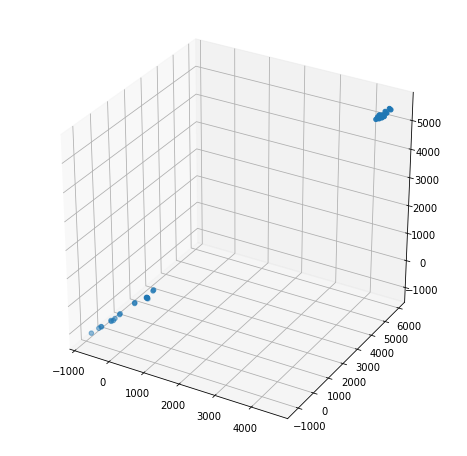

In [36]:
clusters = pd.DataFrame()
for i in range(3):
    clusters['cluster' + str(i)] = M3D[M3D['cluster_id'] == i].mean()
clusters = clusters.drop('cluster_id')

#plot = clusters.T.plot(kind='bar', stacked=True, title="3 Clusters")
#plot.set_xticklabels(my_plot.xaxis.get_majorticklabels(), rotation=0)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(clusters['cluster0'], clusters['cluster1'], clusters['cluster2'])

## X-Means

In [22]:
import numpy as np
from scipy import stats
from sklearn.cluster import KMeans

class XMeans:

    def __init__(self, k_init = 2, **k_means_args):
        self.k_init = k_init
        self.k_means_args = k_means_args

    def fit(self, X):
        self.clusters = [] 

        clusters = self.Cluster.build(X, KMeans(self.k_init, **self.k_means_args).fit(X))
        self.recursively_split(clusters)

        self.labels = np.empty(X.shape[0], dtype = np.intp)
        for i, c in enumerate(self.clusters):
            self.labels[c.index] = i

        self.cluster_centers = np.array([c.center for c in self.clusters])
        self.cluster_log_likelihoods = np.array([c.log_likelihood() for c in self.clusters])
        self.cluster_sizes = np.array([c.size for c in self.clusters])

        return self

    def recursively_split(self, clusters):
        for cluster in clusters:
            if cluster.size <= 3:
                self.clusters.append(cluster)
                continue

            k_means = KMeans(2, **self.k_means_args).fit(cluster.data)
            c1, c2 = self.Cluster.build(cluster.data, k_means, cluster.index)
           
            beta = np.linalg.norm(c1.center - c2.center) / np.sqrt(np.linalg.det(c1.cov) + np.linalg.det(c2.cov))
            alpha = 0.5 / stats.norm.cdf(beta)
            bic = -2 * (cluster.size * np.log(alpha) + c1.log_likelihood() + c2.log_likelihood()) + 2 * cluster.df * np.log(cluster.size)

            if bic < cluster.bic():
                self.recursively_split([c1, c2])
            else:
                self.clusters.append(cluster)

    class Cluster:
        @classmethod
        def build(cls, X, k_means, index = None):
            if index is None:
                index = np.array(range(0, X.shape[0]))
            labels = range(0, k_means.get_params()["n_clusters"])

            return tuple(cls(X, index, k_means, label) for label in labels)

        def __init__(self, X, index, k_means, label):
            self.data = X[k_means.labels_ == label]
            self.index = index[k_means.labels_ == label]
            self.size = self.data.shape[0]
            self.df = self.data.shape[1] * (self.data.shape[1] + 3) / 2
            self.center = k_means.cluster_centers_[label]
            self.cov = np.cov(self.data.T)

        def log_likelihood(self):
            return sum(stats.multivariate_normal.logpdf(x, self.center, self.cov) for x in self.data)

        def bic(self):
            return -2 * self.log_likelihood() + self.df * np.log(self.size)


In [9]:
M2D_head = M2D.iloc[:, [1,2]].copy()
M2D_head.head()

,1,2
0,-0.427356,0.024054
1,-0.427391,0.024052
2,-0.427457,0.024010
3,-0.427563,0.023901
4,-0.427673,0.023735


In [63]:
    x_means = XMeans(random_state = 1)
    x_means.fit(M2D_head)
    print(x_means.labels)
    print(x_means.cluster_centers)
    print(x_means.cluster_log_likelihoods)
    print(x_means.cluster_sizes)

[0 0 0 ... 0 0 0]
[[-0.41070474  0.00224956]
 [-0.67103431  0.02134642]]
[-549.48863596 -366.80178709]
[1628522  248898]


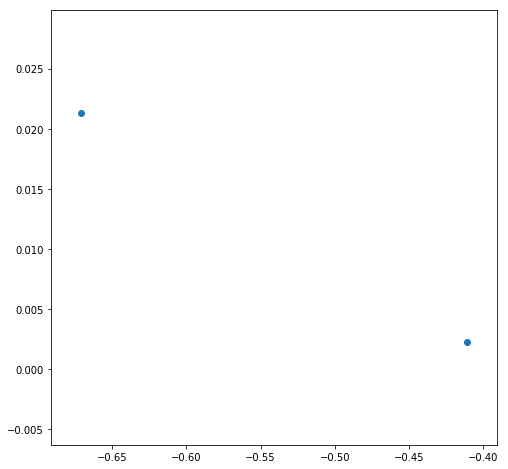

In [72]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
ax.scatter(x_means.cluster_centers[:,0], x_means.cluster_centers[:,1])

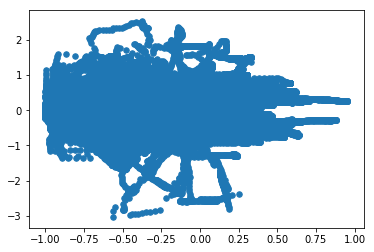

In [19]:
plt.scatter(M2D_head.iloc[:,0].values, M2D_head.iloc[:,1].values, s = 30)
plt.show()

In [63]:
#initialize
M2D['confidence'] = np.zeros((len(M2D.index),1))

x_means = XMeans(random_state = 1)
threshold = 0.05

for p in range(1,28,2): #14 is specific to matching matrix
    reduced = 0
    df = M2D.iloc[:, [p, p+1]].copy()
    print('clustering on ' + str(p) + 'th point. column (' + str(p) + ', '+ str(p+1) + ')')
    x_means.fit(df)
    print(str(len(x_means.cluster_centers)) + ' clusters')
    
    a = np.zeros((len(M2D.index),2))
    b = df.values
    for i in range(len(M2D.index)):
        a[i] = x_means.cluster_centers[x_means.labels[i]]
        
    subs = a-b
    sq_cells = np.einsum("ij, ij -> ij", subs, subs)
    sq_eucliean_dist = sq_cells[:,0] + sq_cells[:,1]
    eucliean_dist = np.sqrt(sq_eucliean_dist)

    for i in range(len(M2D.index)):
        if(eucliean_dist[i] < threshold):
            M2D['confidence'][i] += 1
            reduced += 1
            
    print(str(len(M2D.index)-reduced) + ' points reduced out of 1877420 points.')

clustering on 1th point. column (1, 2)
2 clusters
816615 points reduced out of 1877420 points.
clustering on 3th point. column (3, 4)
2 clusters
1058402 points reduced out of 1877420 points.
clustering on 5th point. column (5, 6)
2 clusters
1245181 points reduced out of 1877420 points.
clustering on 7th point. column (7, 8)
2 clusters
1532262 points reduced out of 1877420 points.
clustering on 9th point. column (9, 10)
2 clusters
1746011 points reduced out of 1877420 points.
clustering on 11th point. column (11, 12)
2 clusters
1248713 points reduced out of 1877420 points.
clustering on 13th point. column (13, 14)
2 clusters
1495368 points reduced out of 1877420 points.


In [53]:
dist = np.linalg.norm(x_means.cluster_centers[x_means.labels[0]]-df.iloc[[0]].values)
print(dist)

0.027435180175602876


In [73]:
M2D.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,confidence
0,0.038047,-0.427356,0.024054,-0.302208,0.103334,-0.260601,0.139904,-0.098150,0.125488,0.027119,...,0.259450,0.096704,0.544963,-0.081477,-0.007468,-0.053658,0.276919,-0.021562,0.572644,3.0
1,0.038150,-0.427391,0.024052,-0.302227,0.103394,-0.260733,0.140352,-0.098240,0.123993,0.026348,...,0.259399,0.096680,0.544943,-0.081422,-0.007429,-0.053651,0.276885,-0.021596,0.572609,3.0
2,0.038234,-0.427457,0.024010,-0.302250,0.103410,-0.260928,0.140892,-0.098335,0.123041,0.025863,...,0.259360,0.096674,0.544931,-0.081372,-0.007408,-0.053638,0.276827,-0.021644,0.572543,3.0
3,0.038252,-0.427563,0.023901,-0.302321,0.103399,-0.261272,0.141418,-0.098540,0.122544,0.025549,...,0.259284,0.096707,0.544841,-0.081339,-0.007421,-0.053673,0.276729,-0.021737,0.572437,3.0
4,0.038226,-0.427673,0.023735,-0.302405,0.103324,-0.261617,0.142053,-0.098732,0.122576,0.025537,...,0.259194,0.096634,0.544763,-0.081317,-0.007433,-0.053710,0.276636,-0.021886,0.572327,3.0


In [72]:
len(M2D.loc[M2D['confidence'] == 6])

37244

In [77]:
from scipy.io import loadmat, savemat  # this is the SciPy module that loads mat-files

confidence = 4 #v
reduced3D = []
reduced2D = []

for i in range(len(M2D.index)):
    if(M2D.iloc[i]['confidence'] > confidence):
        reduced3D.append(M3D_data[i].tolist())
        reduced2D.append(M2D_data[i].tolist())
    
df_save = pd.DataFrame({'data3D':reduced3D, 'data2D':reduced2D})
savemat('3D_libary_reduced.mat', {'struct':df_save.to_dict("list")})